In [332]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np


In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale

In [334]:
data_df = pd.read_csv('telecom_churn_data.csv')
data_df.head(5)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [335]:
data_df.describe


<bound method NDFrame.describe of        mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
1                 0.0      

## Data Cleaning

In [336]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


## Find columns with large missing values or null values

In [337]:
pd.set_option('display.max_rows', 500)
data_df.isnull().sum()*100/len(data_df)

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

## Impute Missing values to 0


In [338]:
all_columns=data_df.columns
date_columns=[x for x in all_columns if 'date' in x]
numeric_columns=[x for x in all_columns if x not in date_columns]

In [339]:
data_df[numeric_columns]=data_df[numeric_columns].fillna(0)


In [340]:
from datetime import date,datetime
data_df['last_date_of_month_7']=data_df['last_date_of_month_7'].fillna('7/31/2014')
data_df['last_date_of_month_8']=data_df['last_date_of_month_8'].fillna('8/31/2014')
data_df['last_date_of_month_9']=data_df['last_date_of_month_9'].fillna('9/30/2014')

In [341]:
data_df[date_columns]=data_df[date_columns].fillna(datetime.strptime(str(date.max), '%Y-%m-%d').strftime('%m/%d/%Y'))

In [342]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [343]:
data_df.isnull().sum()*100/len(data_df)

mobile_number               0.0
circle_id                   0.0
loc_og_t2o_mou              0.0
std_og_t2o_mou              0.0
loc_ic_t2o_mou              0.0
last_date_of_month_6        0.0
last_date_of_month_7        0.0
last_date_of_month_8        0.0
last_date_of_month_9        0.0
arpu_6                      0.0
arpu_7                      0.0
arpu_8                      0.0
arpu_9                      0.0
onnet_mou_6                 0.0
onnet_mou_7                 0.0
onnet_mou_8                 0.0
onnet_mou_9                 0.0
offnet_mou_6                0.0
offnet_mou_7                0.0
offnet_mou_8                0.0
offnet_mou_9                0.0
roam_ic_mou_6               0.0
roam_ic_mou_7               0.0
roam_ic_mou_8               0.0
roam_ic_mou_9               0.0
roam_og_mou_6               0.0
roam_og_mou_7               0.0
roam_og_mou_8               0.0
roam_og_mou_9               0.0
loc_og_t2t_mou_6            0.0
loc_og_t2t_mou_7            0.0
loc_og_t

## No null values in above observation after imputing nan as 0

# 1. Derive New Features

In [344]:
# Code for deriving new features
data_df['diff_ic_og_6'] = data_df['total_ic_mou_6']-data_df['total_og_mou_6']
data_df['diff_ic_og_7'] = data_df['total_ic_mou_7']-data_df['total_og_mou_7']
data_df['diff_ic_og_8'] = data_df['total_ic_mou_8']-data_df['total_og_mou_8']
data_df['diff_ic_og_9'] = data_df['total_ic_mou_9']-data_df['total_og_mou_9']
data_df['diff_vol_3g_2g_6'] = data_df['vol_3g_mb_6']-data_df['vol_2g_mb_6']
data_df['diff_vol_3g_2g_7'] = data_df['vol_3g_mb_7']-data_df['vol_2g_mb_7']
data_df['diff_vol_3g_2g_8'] = data_df['vol_3g_mb_8']-data_df['vol_2g_mb_8']
data_df['diff_vol_3g_2g_9'] = data_df['vol_3g_mb_9']-data_df['vol_2g_mb_9']
data_df['total_service_packs_6'] = data_df['night_pck_user_6']+data_df['monthly_2g_6']+data_df['sachet_2g_6']+data_df['monthly_3g_6']+data_df['sachet_3g_6']+data_df['fb_user_6']
data_df['total_service_packs_7'] = data_df['night_pck_user_7']+data_df['monthly_2g_7']+data_df['sachet_2g_7']+data_df['monthly_3g_7']+data_df['sachet_3g_7']+data_df['fb_user_7']
data_df['total_service_packs_8'] = data_df['night_pck_user_8']+data_df['monthly_2g_8']+data_df['sachet_2g_8']+data_df['monthly_3g_8']+data_df['sachet_3g_8']+data_df['fb_user_8']
data_df['total_service_packs_9'] = data_df['night_pck_user_9']+data_df['monthly_2g_9']+data_df['sachet_2g_9']+data_df['monthly_3g_9']+data_df['sachet_3g_9']+data_df['fb_user_9']
data_df['diff_total_service_packs_good_active_phase']=data_df['total_service_packs_6']+data_df['total_service_packs_7']-data_df['total_service_packs_8']
data_df['diff_ic_good_active_phase']=data_df['total_ic_mou_6']+data_df['total_ic_mou_7']-data_df['total_ic_mou_8']
data_df['diff_og_good_active_phase']=data_df['total_og_mou_6']+data_df['total_og_mou_7']-data_df['total_og_mou_8']
data_df['diff_2g_good_active_phase']=data_df['vol_2g_mb_6']+data_df['vol_2g_mb_7']-data_df['vol_2g_mb_8']
data_df['diff_3g_good_active_phase']=data_df['vol_3g_mb_6']+data_df['vol_3g_mb_7']-data_df['vol_3g_mb_8']
data_df['diff_total_rech_amt_good_active']= data_df['total_rech_amt_6']+data_df['total_rech_amt_7']-data_df['total_rech_amt_8']

# 2. Filter High Value Customer

In [345]:
#Filtering the high value cuustomers
data_df['total_rech_data_amt_good_phase'] = data_df['total_rech_data_6']*data_df['av_rech_amt_data_6']+ data_df['total_rech_data_7']*data_df['av_rech_amt_data_7']
data_df['total_rech_amt_good_phase'] = data_df['total_rech_amt_6']+data_df['total_rech_amt_7']
data_df['total_amt_good_phase'] = data_df['total_rech_data_amt_good_phase']+data_df['total_rech_amt_good_phase']
data_df['total_amt_good_phase'].describe(percentiles=[.25,.5,.70,.90])

count     99999.000000
mean        970.656135
std        1738.847187
min           0.000000
25%         256.000000
50%         550.000000
70%         956.000000
90%        2056.000000
max      122472.000000
Name: total_amt_good_phase, dtype: float64

## High value customers are those who are at 70th percentile or more

In [346]:
data_df_hvc=data_df[data_df['total_amt_good_phase']>=956.00]


In [347]:
data_df_hvc.shape


(30001, 247)

# 3. Churn Tag and remove attributes of churn phase

In [348]:
data_df_hvc['churn']=data_df_hvc['total_ic_mou_9']+data_df_hvc['total_og_mou_9']+data_df_hvc['vol_2g_mb_9']+data_df_hvc['vol_3g_mb_9']
data_df_hvc['churn']=data_df_hvc['churn'].apply(lambda x: 1 if x==0 else 0)

In [349]:
data_df_hvc.churn.value_counts()


0    27560
1     2441
Name: churn, dtype: int64

In [350]:
columns_without_churn_details=[x for x in data_df_hvc.columns if '_9' not in x and 'sep' not in x]


In [351]:
columns_without_churn_details

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_o

In [352]:
data_df_hvc = data_df_hvc[columns_without_churn_details]
data_df_hvc.shape


(30001, 190)

In [353]:
#Check if duplicate entry exists
print(any(data_df_hvc['mobile_number'].duplicated()))


False


In [354]:
# Check for outliers

In [355]:
num_df = data_df_hvc[[x for x in data_df_hvc.columns if x not in date_columns]]
num_df.describe(percentiles=[0.02,.25,.5,.75,.90,.95,.99])


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,diff_total_service_packs_good_active_phase,diff_ic_good_active_phase,diff_og_good_active_phase,diff_2g_good_active_phase,diff_3g_good_active_phase,diff_total_rech_amt_good_active,total_rech_data_amt_good_phase,total_rech_amt_good_phase,total_amt_good_phase,churn
count,3.000100e+04,30001.0,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,109.0,0.0,0.0,0.0,558.490824,560.782203,508.597957,260.793024,267.819295,...,2.478751,306.784552,686.553486,145.706439,362.961271,736.864905,984.010898,1321.230359,2305.241257,0.081364
std,6.908784e+05,0.0,0.0,0.0,0.0,460.640461,479.776947,501.961981,459.644368,479.993989,...,4.303412,463.017407,929.394533,461.537512,1160.818150,712.344917,2477.074460,1030.346823,2717.427964,0.273398
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,...,-46.000000,-3213.830000,-11494.350000,-5006.980000,-15638.140000,-8284.000000,0.000000,0.000000,956.000000,0.000000
2%,7.000049e+09,109.0,0.0,0.0,0.0,39.839000,43.957000,0.000000,0.000000,0.000000,...,-3.000000,-123.910000,-274.600000,-303.410000,-805.650000,-141.000000,0.000000,250.000000,974.000000,0.000000
25%,7.000609e+09,109.0,0.0,0.0,0.0,309.865000,309.826000,231.473000,17.080000,16.030000,...,0.000000,59.440000,94.510000,0.000000,0.000000,347.000000,0.000000,818.000000,1206.000000,0.000000
50%,7.001203e+09,109.0,0.0,0.0,0.0,481.694000,480.943000,427.585000,84.580000,82.810000,...,2.000000,184.820000,424.060000,0.000000,0.000000,616.000000,308.000000,1137.000000,1600.000000,0.000000
75%,7.001804e+09,109.0,0.0,0.0,0.0,699.943000,698.315000,661.491000,290.440000,290.240000,...,4.000000,402.890000,978.020000,110.420000,387.220000,980.000000,1000.000000,1591.000000,2416.000000,0.000000
90%,7.002165e+09,109.0,0.0,0.0,0.0,994.099000,995.859000,977.345000,754.160000,784.480000,...,7.000000,746.340000,1751.760000,524.170000,1314.410000,1446.000000,2465.000000,2236.000000,3983.000000,0.000000
95%,7.002285e+09,109.0,0.0,0.0,0.0,1240.964000,1261.272000,1255.019000,1135.440000,1185.790000,...,10.000000,1062.580000,2425.040000,910.960000,2102.810000,1847.000000,4053.000000,2812.000000,5597.000000,1.000000


In [356]:
filt_df = data_df_hvc[[x for x in data_df_hvc.columns if x not in date_columns]]
low = .001
high = .999
quant_df = filt_df.quantile([low, high])
quant_df

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,diff_total_service_packs_good_active_phase,diff_ic_good_active_phase,diff_og_good_active_phase,diff_2g_good_active_phase,diff_3g_good_active_phase,diff_total_rech_amt_good_active,total_rech_data_amt_good_phase,total_rech_amt_good_phase,total_amt_good_phase,churn
0.001,7.000002e+09,109.0,0.0,0.0,0.0,-3.000,-7.420,-5.000,0.00,0.00,...,-11.0,-930.21,-2169.95,-1705.55,-3827.87,-1302.0,0.0,86.0,956.0,0.0
0.999,7.002408e+09,109.0,0.0,0.0,0.0,3884.712,4115.703,3976.261,4136.34,4355.98,...,35.0,4323.76,7376.20,4474.42,11801.97,5850.0,30059.0,8562.0,34817.0,1.0


In [357]:
filt_df = filt_df.apply(lambda x: x[(x>=quant_df.loc[low,x.name]) & 
                                    (x <= quant_df.loc[high,x.name])], axis=0)

In [358]:

#Merging with the leads dataframe
data_df_hvc = pd.concat([data_df_hvc.loc[:, ~data_df_hvc.columns.isin([x for x in data_df_hvc.columns if x not in date_columns])], filt_df], axis=1)

In [359]:
#Dropping NA values
data_df_hvc.dropna(inplace=True)
data_df_hvc.shape

(27861, 190)

In [360]:
data_df_hvc.churn.value_counts()


0    25603
1     2258
Name: churn, dtype: int64

In [361]:
data_df_hvc.corr()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,diff_total_service_packs_good_active_phase,diff_ic_good_active_phase,diff_og_good_active_phase,diff_2g_good_active_phase,diff_3g_good_active_phase,diff_total_rech_amt_good_active,total_rech_data_amt_good_phase,total_rech_amt_good_phase,total_amt_good_phase,churn
mobile_number,1.000000,NaN,NaN,NaN,NaN,0.040582,0.042131,0.051268,0.008680,0.005527,...,-0.045911,0.061251,0.010018,-0.009346,-0.025159,0.025764,-0.041582,0.048917,-0.019247,-0.030761
circle_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_ic_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arpu_6,0.040582,NaN,NaN,NaN,NaN,1.000000,0.568407,0.486615,0.428337,0.265129,...,-0.204380,0.280956,0.559188,-0.095560,0.068604,0.726384,-0.081204,0.856907,0.278579,0.071444
arpu_7,0.042131,NaN,NaN,NaN,NaN,0.568407,1.000000,0.678730,0.282150,0.427827,...,-0.222945,0.206619,0.444908,-0.113225,0.035164,0.595882,-0.068533,0.869382,0.295814,-0.034008
arpu_8,0.051268,NaN,NaN,NaN,NaN,0.486615,0.678730,1.000000,0.194485,0.301670,...,-0.266891,0.099648,0.094922,-0.132430,-0.060451,0.105658,-0.075031,0.664284,0.204464,-0.217259
onnet_mou_6,0.008680,NaN,NaN,NaN,NaN,0.428337,0.282150,0.194485,1.000000,0.753792,...,-0.205499,0.064964,0.624233,-0.112203,-0.122093,0.358347,-0.180307,0.398101,-0.006223,0.071940
onnet_mou_7,0.005527,NaN,NaN,NaN,NaN,0.265129,0.427827,0.301670,0.753792,1.000000,...,-0.216265,0.018560,0.519061,-0.119536,-0.130805,0.272603,-0.185208,0.393708,-0.012710,0.015358


In [362]:
#Removing variables which do not capture any variance
data_df_hvc=data_df_hvc.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],1)

In [363]:
#Converting datetime to categories
data_df_hvc['date_of_last_rech_6'] = data_df_hvc['date_of_last_rech_6'].astype('category')
data_df_hvc['date_of_last_rech_7'] = data_df_hvc['date_of_last_rech_7'].astype('category')
data_df_hvc['date_of_last_rech_8'] = data_df_hvc['date_of_last_rech_8'].astype('category')
data_df_hvc['date_of_last_rech_data_6'] = data_df_hvc['date_of_last_rech_data_6'].astype('category')
data_df_hvc['date_of_last_rech_data_7'] = data_df_hvc['date_of_last_rech_data_7'].astype('category')
data_df_hvc['date_of_last_rech_data_8'] = data_df_hvc['date_of_last_rech_data_8'].astype('category')
cat_columns = data_df_hvc.select_dtypes(['category']).columns
data_df_hvc[cat_columns] = data_df_hvc[cat_columns].apply(lambda x: x.cat.codes)

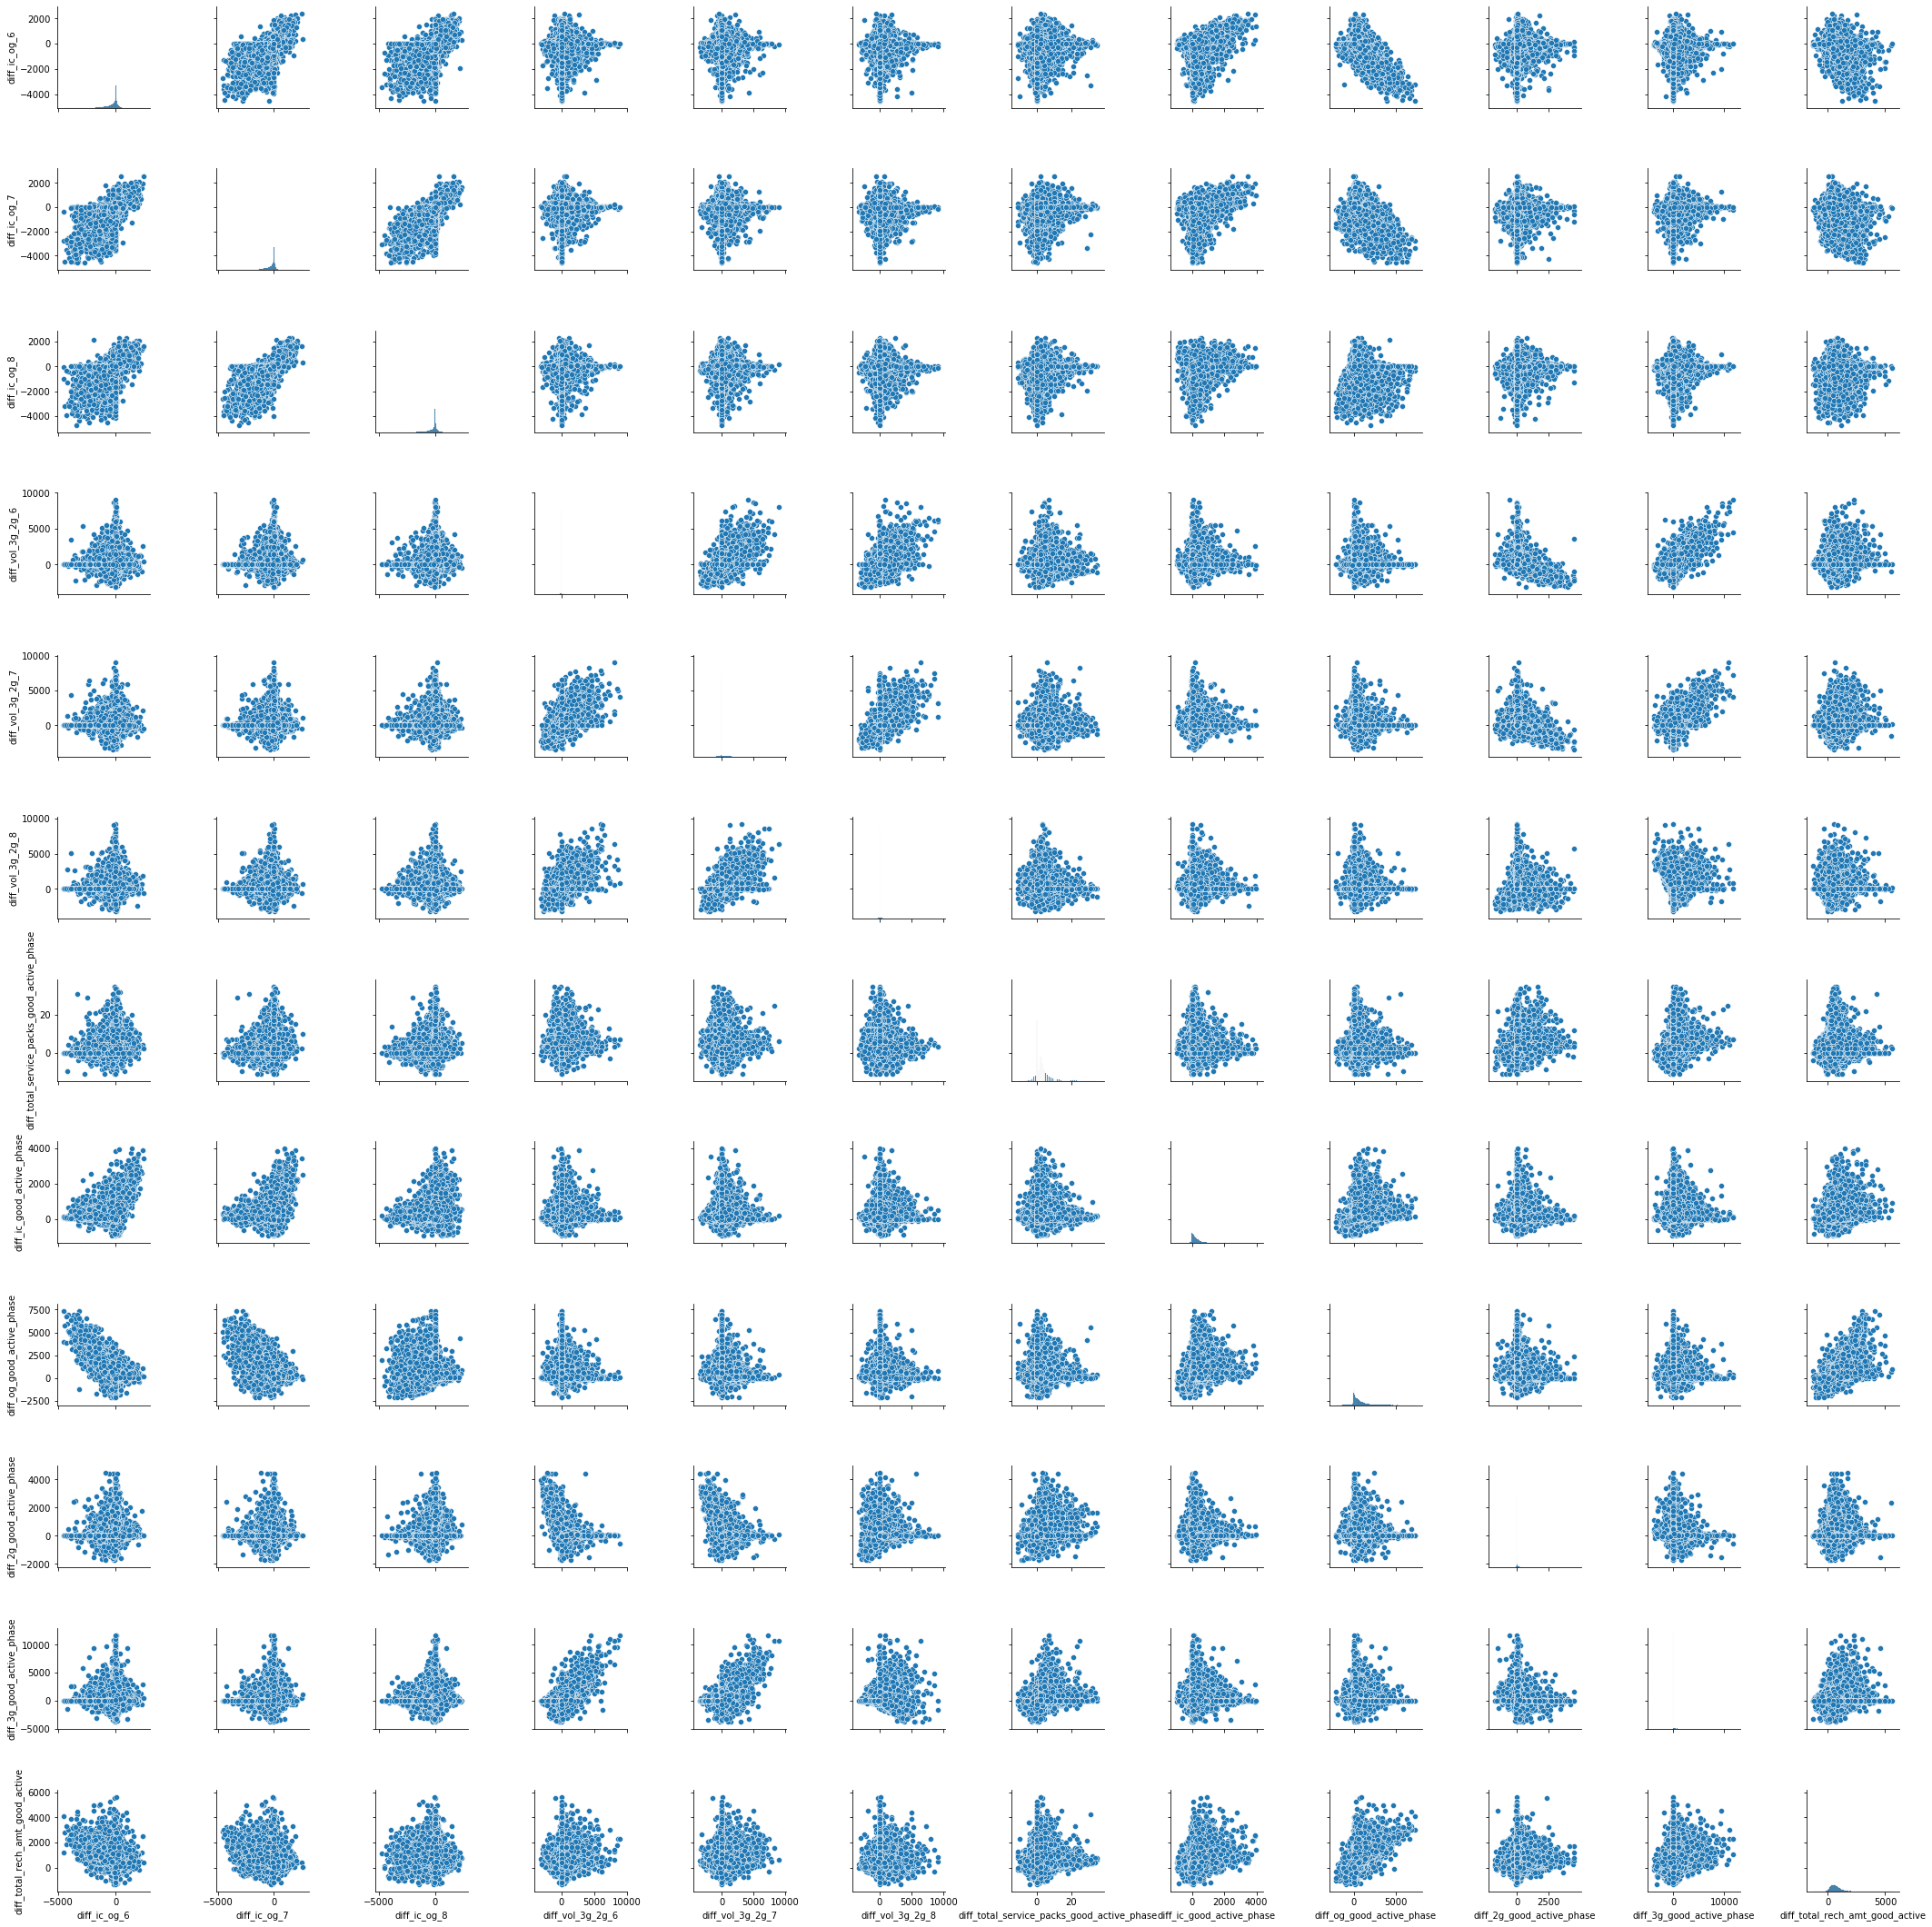

In [364]:

### EDA on derived variables.
# the commonly used alias for seaborn is sns
import seaborn as sns

sns.pairplot(data_df_hvc[[x for x in data_df_hvc.columns if 'diff' in x]])
plt.show()

## Handling Class Imbalance using SMOTE

Text(0.5, 1.0, 'churned')

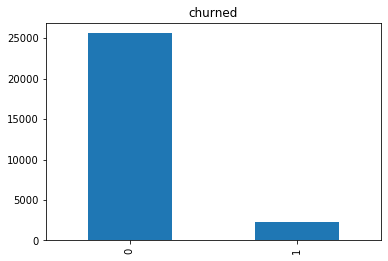

In [365]:
data_df_hvc['churn'].value_counts().plot(kind='bar').set_title('churned')


In [366]:
!pip install imblearn

In [367]:
!pip update scikit-learn

ERROR: unknown command "update"



In [368]:
from imblearn.over_sampling  import SMOTE
from sklearn.model_selection import train_test_split
# Separate input features and target
y = data_df_hvc.churn
X = data_df_hvc.drop('churn', axis=1)
# scaling the features
X_scaled = scale(X)
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, test_size=0.3, random_state=100)

sm = SMOTE(random_state=100,sampling_strategy='auto')
X_train, y_train = sm.fit_resample(X_train, y_train)

In [369]:
#pd.DataFrame(y_train)[0].value_counts().plot('bar').set_title('churned')


## Performing PCA for feature reduction


In [370]:
X_train.shape


(35936, 182)

In [371]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [372]:

#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [373]:
pca.components_


array([[-5.68742944e-02, -4.68017313e-02, -1.80483989e-02, ...,
         1.18766750e-01, -1.15185977e-01,  6.51577065e-02],
       [-2.59307193e-03,  4.60930282e-02,  5.69476437e-02, ...,
         1.87860287e-02,  1.57345131e-01,  8.32100182e-02],
       [ 6.83852104e-04, -1.18015765e-02,  4.81331241e-04, ...,
         7.19608233e-02,  6.59920207e-02,  9.58633666e-02],
       ...,
       [-0.00000000e+00,  8.71643873e-17, -7.25721016e-17, ...,
         1.61198177e-11,  3.80714905e-11, -1.69444002e-11],
       [ 0.00000000e+00,  9.17619577e-17,  1.80127087e-17, ...,
        -4.02378963e-11,  1.74029824e-10,  4.22956642e-11],
       [ 0.00000000e+00, -2.63027930e-18,  6.16433764e-17, ...,
         4.86415103e-11, -7.37086126e-11, -5.11292169e-11]])

In [374]:
pca.explained_variance_ratio_

array([1.41664373e-01, 9.11593994e-02, 6.11852926e-02, 5.88951283e-02,
       4.14217473e-02, 3.51036937e-02, 2.98802120e-02, 2.90093944e-02,
       2.33297202e-02, 2.23286393e-02, 1.93679622e-02, 1.92862996e-02,
       1.56463107e-02, 1.44283841e-02, 1.40528464e-02, 1.31754021e-02,
       1.26793443e-02, 1.25142060e-02, 1.11476529e-02, 1.10081753e-02,
       1.06999920e-02, 1.00398477e-02, 9.88719774e-03, 9.08373239e-03,
       8.78323086e-03, 8.54892014e-03, 8.45365736e-03, 7.92438968e-03,
       7.27023583e-03, 7.09983278e-03, 6.98370461e-03, 6.58134121e-03,
       6.32741022e-03, 6.26444845e-03, 6.11746906e-03, 5.93001328e-03,
       5.62315590e-03, 5.52412899e-03, 5.48325745e-03, 5.38368344e-03,
       5.23960516e-03, 5.15982188e-03, 4.96171749e-03, 4.88851113e-03,
       4.82906765e-03, 4.69619158e-03, 4.40589578e-03, 4.36540184e-03,
       4.29971723e-03, 4.12570091e-03, 4.03654898e-03, 3.89644248e-03,
       3.85570764e-03, 3.68823848e-03, 3.56991735e-03, 3.56553500e-03,
      

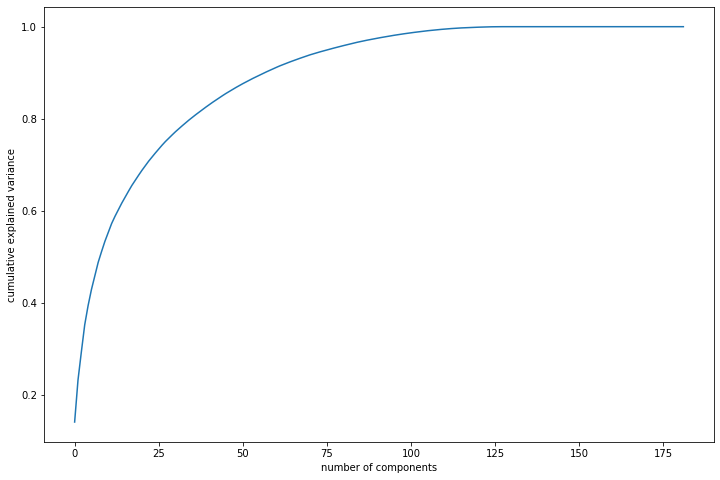

In [375]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [376]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=55)

In [377]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(35936, 55)

In [378]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

In [379]:
corrmat

array([[ 1.00000000e+00, -2.50140917e-06, -1.41723527e-05, ...,
         8.87319559e-05,  3.09104514e-05, -3.70041361e-05],
       [-2.50140917e-06,  1.00000000e+00,  8.33393673e-06, ...,
        -1.05329064e-04, -1.40617801e-05, -7.17528079e-05],
       [-1.41723527e-05,  8.33393673e-06,  1.00000000e+00, ...,
        -1.13038059e-04,  1.56795875e-04,  1.55877434e-05],
       ...,
       [ 8.87319559e-05, -1.05329064e-04, -1.13038059e-04, ...,
         1.00000000e+00,  4.79969783e-03,  4.00649310e-03],
       [ 3.09104514e-05, -1.40617801e-05,  1.56795875e-04, ...,
         4.79969783e-03,  1.00000000e+00, -1.80614304e-03],
       [-3.70041361e-05, -7.17528079e-05,  1.55877434e-05, ...,
         4.00649310e-03, -1.80614304e-03,  1.00000000e+00]])

In [380]:

# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.027529575392311233 , min corr:  -0.015839937019663828


In [381]:

#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8359, 55)

In [382]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [383]:
y_train_pred = model_pca.predict_proba(df_train_pca)[:,1]
y_train_pred

array([0.01480913, 0.66288067, 0.00602846, ..., 0.99180658, 0.86644992,
       0.89702317])

In [384]:
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.014809
1,0,0.662881
2,0,0.006028
3,0,0.013832
4,0,0.001867


In [385]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.014809,1,0,0,0,0,0,0,0,0,0
1,0,0.662881,1,1,1,1,1,1,1,0,0,0
2,0,0.006028,1,0,0,0,0,0,0,0,0,0
3,0,0.013832,1,0,0,0,0,0,0,0,0,0
4,0,0.001867,1,0,0,0,0,0,0,0,0,0


In [386]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.728629  0.980076  0.477182
0.2   0.2  0.789348  0.961098  0.617598
0.3   0.3  0.820152  0.930321  0.709984
0.4   0.4  0.838018  0.898152  0.777883
0.5   0.5  0.846839  0.859918  0.833760
0.6   0.6  0.847340  0.813390  0.881289
0.7   0.7  0.837433  0.757569  0.917297
0.8   0.8  0.797195  0.646204  0.948186
0.9   0.9  0.683354  0.389081  0.977627


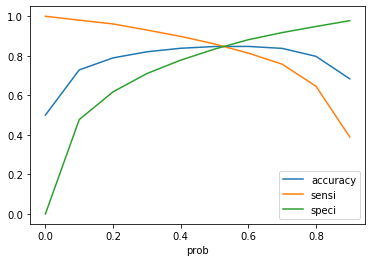

In [387]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.53 is the optimum point to take it as a cutoff probability.

In [388]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_pred_final.head()


,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.014809,1,0,0,0,0,0,0,0,0,0,0
1,0,0.662881,1,1,1,1,1,1,1,0,0,0,1
2,0,0.006028,1,0,0,0,0,0,0,0,0,0,0
3,0,0.013832,1,0,0,0,0,0,0,0,0,0,0
4,0,0.001867,1,0,0,0,0,0,0,0,0,0,0


In [389]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion

array([[15276,  2692],
       [ 2765, 15203]], dtype=int64)

In [390]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
y_test_df=pd.DataFrame(y_test)
y_pred_df=pd.DataFrame(pred_probs_test)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_df.reset_index(drop=True, inplace=True)
y_test_pred_final=pd.concat([y_test_df, y_pred_df],axis=1)


In [391]:
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Churn_prob'})

In [392]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_prob.map(lambda x: 1 if x > 0.53 else 0)

In [393]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted )
confusion2

array([[6377, 1258],
       [ 137,  587]], dtype=int64)

In [394]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [395]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8107734806629834

In [396]:
# Positive predictive value 
print (TP / float(TP+FP))

0.3181571815718157


In [397]:

# Negative predictive value
print (TN / float(TN+ FN))

0.9789683758059564


In [398]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, pred_probs_test, drop_intermediate = False )


In [399]:
print("ROC AUC Score : ", metrics.roc_auc_score(y_test_df, y_pred_df))

ROC AUC Score :  0.8925645924012346


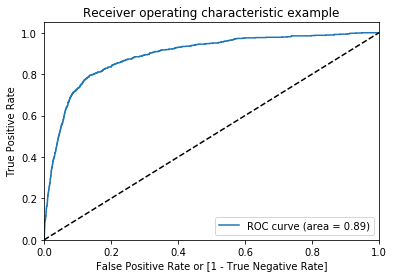

In [400]:
def draw_roc(actual, probability):
    fpr, tpr, thershoulds = metrics.roc_curve(actual, probability, drop_intermediate=False)
    auc = metrics.roc_auc_score(actual, probability)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

draw_roc(y_test, pred_probs_test)


### Using SVM Model

In [401]:
# using rbf kernel, C=1, default value of gamma

model = SVC(C = 1, kernel='rbf')
model.fit(df_train_pca,y_train)
y_pred = model.predict(df_test_pca)

In [402]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[6814,  821],
       [ 185,  539]], dtype=int64)

In [403]:
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

# roc/auc score
print("ROC_AUC", metrics.roc_auc_score(y_test, y_pred))

accuracy 0.879650675918172
precision 0.3963235294117647
recall 0.744475138121547
ROC_AUC 0.8184720156881474


##Hyperparameter Tuning
#### Hyperparameters to optimise:

-The choice of kernel (linear, rbf etc.)
-C
-gamma


In [404]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]



# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds,
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(df_train_pca,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='roc_auc', verbose=1)

In [405]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,127.822361,2.224305,20.520303,0.218832,1,0.0100,"{'C': 1, 'gamma': 0.01}",0.975917,0.978979,0.972024,...,0.974400,0.002758,4,0.980353,0.979977,0.981311,0.980547,0.980823,0.980602,0.000449
1,119.366354,0.682394,25.414169,0.367995,1,0.0010,"{'C': 1, 'gamma': 0.001}",0.934078,0.941103,0.932644,...,0.934352,0.003469,10,0.936345,0.935158,0.936977,0.937153,0.937201,0.936567,0.000768
2,122.094869,12.366621,29.670456,0.926051,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.914279,0.922573,0.912309,...,0.915095,0.003792,12,0.915937,0.913963,0.916317,0.916185,0.916180,0.915717,0.000885
3,138.543379,1.186307,13.186450,0.534513,10,0.0100,"{'C': 10, 'gamma': 0.01}",0.989366,0.990067,0.986122,...,0.988363,0.001502,2,0.995185,0.994994,0.995618,0.995360,0.995525,0.995336,0.000226
4,87.253349,6.300579,21.414501,1.679542,10,0.0010,"{'C': 10, 'gamma': 0.001}",0.954048,0.958679,0.949894,...,0.952652,0.003413,7,0.956490,0.955604,0.957792,0.957301,0.956993,0.956836,0.000747
5,96.032234,2.116745,25.661746,0.413388,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.921188,0.928915,0.918615,...,0.921478,0.003818,11,0.922748,0.921090,0.923346,0.923367,0.923064,0.922723,0.000847
6,175.493493,9.843061,9.579267,0.150320,100,0.0100,"{'C': 100, 'gamma': 0.01}",0.990130,0.991361,0.987739,...,0.989249,0.001395,1,0.999543,0.999572,0.999504,0.999460,0.999706,0.999557,0.000084
7,133.256379,3.565129,17.138046,1.567447,100,0.0010,"{'C': 100, 'gamma': 0.001}",0.968634,0.971854,0.964545,...,0.966600,0.003198,6,0.974573,0.974189,0.975886,0.975358,0.975513,0.975104,0.000626
8,98.662037,2.110334,24.348065,1.309826,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.934517,0.941597,0.932935,...,0.934644,0.003599,9,0.936904,0.935689,0.937669,0.937711,0.937803,0.937155,0.000801
9,208.896712,11.465378,7.839679,0.466495,1000,0.0100,"{'C': 1000, 'gamma': 0.01}",0.986478,0.989108,0.984947,...,0.986047,0.001685,3,1.000000,1.000000,0.999983,0.999983,0.999978,0.999989,0.000009


In [406]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} for hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9892493792166688 for hyperparameters {'C': 100, 'gamma': 0.01}


In [407]:
# specify optimal hyperparameters
best_params = {"C": 100, "gamma": 0.01, "kernel":"rbf"}

# model
model = SVC(C=100, gamma=0.01, kernel="rbf")

model.fit(df_train_pca,y_train)
y_pred = model.predict(df_test_pca)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred))
print("roc_auc_score", metrics.roc_auc_score(y_test, y_pred))


[[7201  434]
 [ 404  320]] 

accuracy 0.8997487737767675
precision 0.4244031830238727
sensitivity/recall 0.4419889502762431
roc_auc_score 0.6925727331603875


###  Random Forest Model

In [408]:
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier()

In [409]:
# Making predictions
predictions = rfc.predict(df_test_pca)


In [410]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [411]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7635
           1       0.47      0.52      0.49       724

    accuracy                           0.91      8359
   macro avg       0.71      0.73      0.72      8359
weighted avg       0.91      0.91      0.91      8359



In [412]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [3, 6]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring= 'roc_auc', 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [3, 6],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [413]:

# printing the optimal accuracy score and hyperparameters
print('We can get best score of',grid_search.best_score_,'using',grid_search.best_params_)


We can get best score of 0.936379847359615 using {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [414]:

# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=6,
                             n_estimators=200)

In [415]:
# fit
rfc.fit(df_train_pca,y_train)
# predict
predictions = rfc.predict(df_test_pca)

In [416]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7635
           1       0.36      0.74      0.49       724

    accuracy                           0.87      8359
   macro avg       0.67      0.81      0.71      8359
weighted avg       0.92      0.87      0.89      8359



In [417]:
# metrics
print(metrics.confusion_matrix(y_test, predictions), "\n")
print("accuracy", metrics.accuracy_score(y_test, predictions))
print("precision", metrics.precision_score(y_test, predictions))
print("sensitivity/recall", metrics.recall_score(y_test, predictions))
print("roc_auc_score", metrics.roc_auc_score(y_test, predictions))

[[6703  932]
 [ 189  535]] 

accuracy 0.8658930494078239
precision 0.36468984321745057
sensitivity/recall 0.738950276243094
roc_auc_score 0.8084404295426341


## Based on the above models the best model is first one i.e Logistic regression model with PCA which gives recall of 81% and ROC value of .89

### Identify Important predictors which could help for Business Decision Making


In [418]:
y = data_df_hvc.churn
X = data_df_hvc.drop('churn', axis=1)
# scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled_df=pd.DataFrame(X_scaled,columns=X.columns)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, train_size=0.7, test_size=0.3, random_state=100)

In [419]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 60)             # running RFE with 60 variables as output
rfe = rfe.fit(X_train, y_train)

In [420]:
rfe.support_


array([False, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False,  True,  True,  True, False,  True,
        True, False, False,  True, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False,  True, False, False,
        True,  True, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,

In [421]:
X_scaled_df.head()


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,mobile_number,arpu_6,arpu_7,arpu_8,...,total_service_packs_8,diff_total_service_packs_good_active_phase,diff_ic_good_active_phase,diff_og_good_active_phase,diff_2g_good_active_phase,diff_3g_good_active_phase,diff_total_rech_amt_good_active,total_rech_data_amt_good_phase,total_rech_amt_good_phase,total_amt_good_phase
0,-1.198162,-2.562876,1.754628,0.463638,-0.189903,2.001931,-0.530951,-0.986211,-0.947754,-0.737110,...,-0.006727,-0.110538,-0.788733,-0.798892,-0.283613,-0.227086,-0.621740,-0.220594,-0.906864,-0.586440
1,0.035140,-0.549843,-0.216251,-0.937936,-0.954926,-0.879224,-0.735825,1.572421,2.449825,7.518538,...,-0.697019,-0.620382,1.274749,0.098136,-0.347993,-0.365658,-3.574905,-0.532155,1.580078,0.149865
2,-0.375961,0.859280,0.679603,-0.937936,1.435770,0.657392,0.459064,-0.454008,-0.117371,-0.950477,...,0.683566,-0.875304,-0.460045,0.124388,0.543726,0.455430,0.385598,-0.313320,-0.306372,-0.425300
3,0.857342,0.859280,0.858774,-0.937936,-0.954926,-0.879224,1.329010,-0.055648,0.198519,0.446264,...,-0.697019,-0.620382,-0.562704,0.187020,-0.347993,-0.365658,-0.259388,-0.532155,0.036361,-0.491167
4,-2.020364,1.664493,-0.574593,-0.937936,1.818282,1.809854,-0.466061,-1.347306,-1.010372,-0.309592,...,0.338420,-0.620382,-0.654330,-0.756913,-0.346815,-0.822117,-1.250419,-0.092013,-1.133465,-0.558211


In [422]:
rfeList = list(zip(X_train.columns, rfe.support_ == True, rfe.ranking_))
rfeList
rfe_df = pd.DataFrame(rfeList, columns = ['column', 'Support','Ranking']) 
rfe_df.head()
rfe_df = rfe_df[rfe_df.Support]
rfe_df.head()
rfe_df.sort_values('Ranking').head(80)

,column,Support,Ranking
2,date_of_last_rech_8,True,1
109,max_rech_amt_6,True,1
113,last_day_rch_amt_7,True,1
114,last_day_rch_amt_8,True,1
115,total_rech_data_6,True,1
124,count_rech_3g_6,True,1
127,av_rech_amt_data_6,True,1
132,vol_2g_mb_8,True,1
133,vol_3g_mb_6,True,1
134,vol_3g_mb_7,True,1


In [423]:
col = X_train.columns[rfe.support_]

In [424]:
X_train.columns[~rfe.support_]


Index(['date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_data_6', 'mobile_number', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'roam_ic_mou_6',
       ...
       'diff_vol_3g_2g_6', 'diff_vol_3g_2g_7', 'diff_vol_3g_2g_8',
       'total_service_packs_6', 'total_service_packs_7',
       'diff_total_service_packs_good_active_phase',
       'diff_3g_good_active_phase', 'diff_total_rech_amt_good_active',
       'total_rech_data_amt_good_phase', 'total_rech_amt_good_phase'],
      dtype='object', length=122)

In [425]:

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
rfc.fit(X_train[col],y_train)

RandomForestClassifier()

In [426]:
# Making predictions
predictions = rfc.predict(X_test[col])

In [427]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.95      0.98      0.97      7635
           1       0.74      0.49      0.59       724

    accuracy                           0.94      8359
   macro avg       0.85      0.73      0.78      8359
weighted avg       0.93      0.94      0.94      8359



In [428]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,12,16],
    'min_samples_leaf': range(100, 800, 200),
    'min_samples_split': range(200, 1000, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [6,9,12]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring= 'roc_auc', 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train[col],y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 12, 16], 'max_features': [6, 9, 12],
                         'min_samples_leaf': range(100, 800, 200),
                         'min_samples_split': range(200, 1000, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [429]:
# printing the optimal accuracy score and hyperparameters
print('We can get best score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best score of 0.9284001877282265 using {'max_depth': 12, 'max_features': 12, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [430]:

# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=12,
                             n_estimators=200)

In [431]:
# fit
rfc.fit(X_train[col],y_train)
# predict
predictions = rfc.predict(X_test[col])

In [432]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      7635
           1       0.75      0.47      0.58       724

    accuracy                           0.94      8359
   macro avg       0.85      0.73      0.77      8359
weighted avg       0.93      0.94      0.93      8359



In [433]:
# metrics
print(metrics.confusion_matrix(y_test, predictions), "\n")
print("accuracy", metrics.accuracy_score(y_test, predictions))
print("precision", metrics.precision_score(y_test, predictions))
print("sensitivity/recall", metrics.recall_score(y_test, predictions))
print("roc_auc_score", metrics.roc_auc_score(y_test, predictions))

[[7519  116]
 [ 382  342]] 

accuracy 0.940423495633449
precision 0.7467248908296943
sensitivity/recall 0.4723756906077348
roc_auc_score 0.728591250673874


### Stats


In [434]:
confusion=metrics.confusion_matrix(y_test, predictions)

In [435]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [436]:

# Let's see the sensitivity of our logistic regression model
Senstivity = TP / float(TP+FN)
Senstivity

0.4723756906077348

In [437]:
# specificity
specificity = TN / float(TN+FP)
specificity

0.9848068107400131

In [438]:

# Calculate false postive rate
FPR=FP/ float(TN+FP)
FPR

0.015193189259986903

In [439]:

# positive predictive value 
PPV = TP / float(TP+FP)
PPV

0.7467248908296943

In [440]:
# Negative predictive value
NPV = TN / float(TN+ FN)
NPV

0.9516516896595367

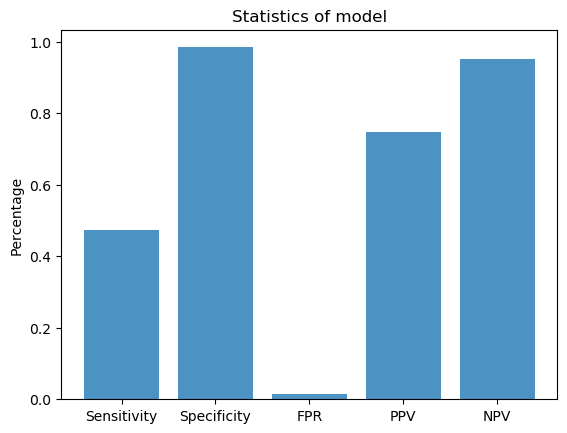

In [441]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Sensitivity', 'Specificity', 'FPR', 'PPV', 'NPV')
y_pos = np.arange(len(objects))
values = [Senstivity,specificity,FPR,PPV,NPV]

plt.bar(y_pos, values, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Statistics of model')

plt.show()

In [442]:
def plot_most_important_feature(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
   
    __name__ = "plot_most_important_feature"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except ( ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

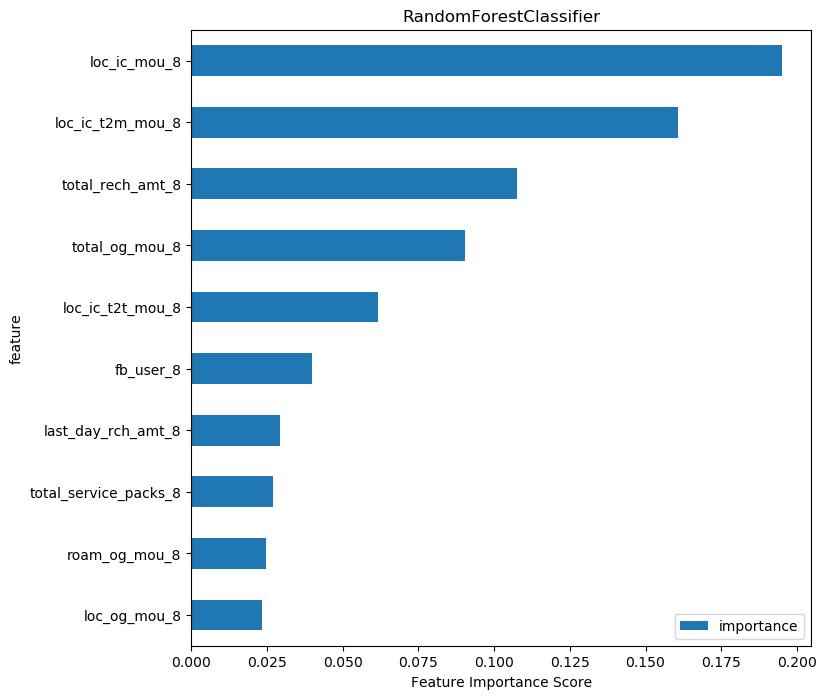

,importance
feature,
loc_og_mou_8,0.023458
roam_og_mou_8,0.024840
total_service_packs_8,0.027129
last_day_rch_amt_8,0.029235
fb_user_8,0.039956
loc_ic_t2t_mou_8,0.061730
total_og_mou_8,0.090400
total_rech_amt_8,0.107559
loc_ic_t2m_mou_8,0.160824


In [443]:
plot_most_important_feature(rfc, X_train[col], y_train, top_n=10,title=rfc.__class__.__name__)

# Observation

## Based on above data, following are the factors which affects the churn most:

- Local Incoming Calls in the month of August
- Local Incoming Telecom to Mobile calls in the month of August
- Total Outgoing calls in the month of August
- Local Outgoing calls in the month of August
- FB user in the month of August
- Total recharge amount in the month of August


## Recommendation :
- Customers making reduced number of calls can be provided with some incentives , which could encourage them to make more calls.
- Customers receiving lesser incoming calls : This signifies customer is becoming passive and is in process of  stopping the usage of this phone number, hence some short term attractive plan could be offered .
- For Reduced FB users, customers can be provided with only social media package.
- Total recharge amount has negative corelation , which signifies that people reduced their recharge during a month before churn. Hence, people who suddenly drops the avg monthly recharge amount should be proactively contacted and then some discounted deals can be offered which could provide similar service in lesser price , so that customers sees value in staying with same telecom provider